In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

X, y = make_moons (n_samples = 500, noise = 0.15, random_state = 49)
y = y*2-1.0 # convert the labels from {0,1} to {-1, +1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

import matplotlib.pyplot as plt

def plot_svm (clf, X, y, axes=[-2, 3, -2, 2]):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s)
    X_mesh = np.c_[x0.ravel(), x1.ravel()] # convert all mesh points into 2-D points
    y_pred = clf.predict(X_mesh).reshape(x0.shape) # predict then covert back to the 2-D
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figsize=(16, 9)
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bo", label="Class -1")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Class +1")
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")
    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k',
                 levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")

    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


Results for Linear kernel:
Best parameters: {'C': 10}

Confusion Matrix:
[[34 11]
 [ 5 50]]

Precision: 0.820
Recall: 0.909


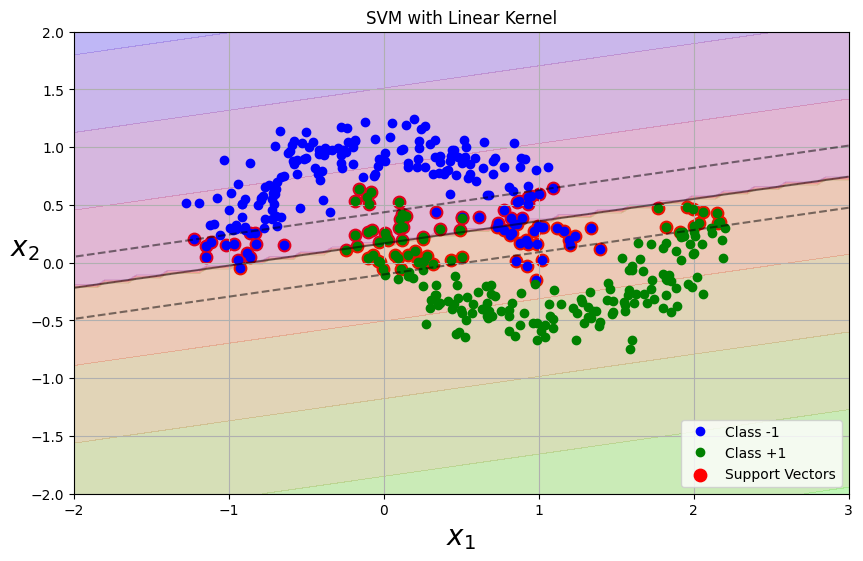


Results for Polynomial kernel:
Best parameters: {'C': 0.1, 'degree': 3, 'gamma': 1}

Confusion Matrix:
[[37  8]
 [ 0 55]]

Precision: 0.873
Recall: 1.000


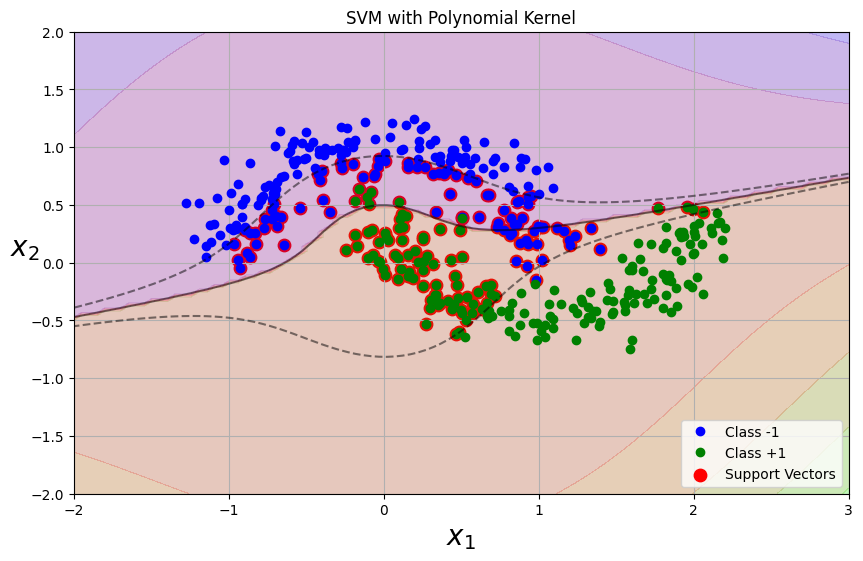


Results for RBF kernel:
Best parameters: {'C': 10, 'gamma': 'scale'}

Confusion Matrix:
[[42  3]
 [ 0 55]]

Precision: 0.948
Recall: 1.000


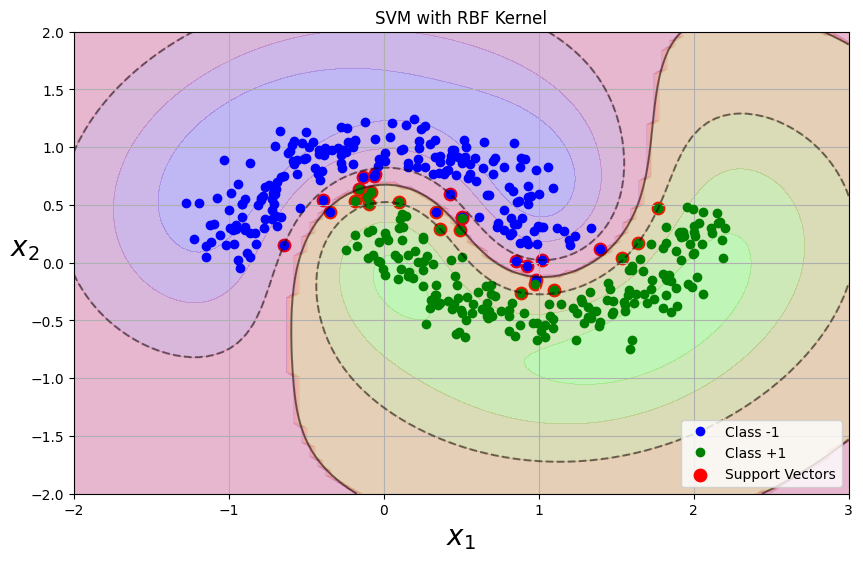


Analysis of Results:
1. Linear Kernel: The linear kernel performs reasonably well but has lowest precision of the three. Based on the plot, the simple 
decision boundary might not capture all the nonlinear patterns. The best value chosen was C = 10 where it provides a good balance as shown 
by the decent precision and recall values. A lower C would create a wider margin but risk underfitting & allowing more misclassifications, 
while a higher C would promote a stricter classification resulting in a risk of overfitting due to noise

2. Polynomial Kernel: The polynomial kernal has better precision than linear kernel, along with perfect recall indicating no false 
negatives. The more flexible decision boundary is able to capture the nonlinear patterns. It was found that gamma = 1 worked best, where 
higher values than 1 would create more wiggly-complex boundaries. Lower values would make the boundary smoother but it missed important 
patterns. The C = 0.1 suggests that a softer margin wo

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

def evaluate_svm(clf, X_train, X_test, y_train, y_test, kernel_name):

    clf.fit(X_train, y_train)
    best_estimator = clf.best_estimator_
    best_params = clf.best_params_
    y_pred = best_estimator.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"\nResults for {kernel_name} kernel:")
    print("Best parameters:", best_params)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print(f"\nPrecision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")

    plt.figure(figsize=(10, 6))
    plt.title(f"SVM with {kernel_name} Kernel")
    plot_svm(best_estimator, X_train, y_train)
    plt.show()

    return best_estimator, conf_matrix, precision, recall, best_params

# Linear Kernel
param_grid_linear = {
    'C': [0.1, 1, 10, 100]
}
linear_grid = GridSearchCV(
    SVC(kernel='linear', random_state=42),
    param_grid_linear,
    cv=5,
    scoring='accuracy'
)
linear_svm, linear_conf, linear_precision, linear_recall, linear_params = evaluate_svm(
    linear_grid, X_train, X_test, y_train, y_test, "Linear"
)

# Polynomial Kernel
param_grid_poly = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1]
}
poly_grid = GridSearchCV(
    SVC(kernel='poly', random_state=42),
    param_grid_poly,
    cv=5,
    scoring='accuracy'
)
poly_svm, poly_conf, poly_precision, poly_recall, poly_params = evaluate_svm(
    poly_grid, X_train, X_test, y_train, y_test, "Polynomial"
)

# RBF Kernel
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}
rbf_grid = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid_rbf,
    cv=5,
    scoring='accuracy'
)
rbf_svm, rbf_conf, rbf_precision, rbf_recall, rbf_params = evaluate_svm(
    rbf_grid, X_train, X_test, y_train, y_test, "RBF"
)

print("\nAnalysis of Results:")
print("""1. Linear Kernel: The linear kernel performs reasonably well but has lowest precision of the three. Based on the plot, the simple
decision boundary might not capture all the nonlinear patterns. The best value chosen was C = 10 where it provides a good balance as shown
by the decent precision and recall values. A lower C would create a wider margin but risk underfitting & allowing more misclassifications,
while a higher C would promote a stricter classification resulting in a risk of overfitting due to noise""")

print("""\n2. Polynomial Kernel: The polynomial kernal has better precision than linear kernel, along with perfect recall indicating no false
negatives. The more flexible decision boundary is able to capture the nonlinear patterns. It was found that gamma = 1 worked best, where
higher values than 1 would create more wiggly-complex boundaries. Lower values would make the boundary smoother but it missed important
patterns. The C = 0.1 suggests that a softer margin works well with these polynomial parameters""")

print("""\n3. RBF Kernel: The RBF Kernal as the best overall performance with highest precision, it also has perfect recall like the
polynomial kernel. Based on the plot and the data, it seems this is the most flexible decision boundary for this dataset. The C = 10 is a
strict margin that has worked well with RBF. The Gamma = 'scale' (which uses 1 . (n_features*X.var())) worked better than fixed values.
The automatic scaling adapts to the data's variance where it accounts for the data's natural spread. Overlall RBF performed the best most
likely due to the automatic gamma scaling preventing overfitting and the high C value enforcing good seperation.""")


In [ ]:
# Linear Kernel
def linear_kernel(u, v):
    return np.dot(u, v)

# Polynomial Kernel (of degree up to and including p)
def polynomial_kernel(u, v, p=3):
    return (np.dot(u, v) + 1) ** p
# Gaussian RBF Kernel
def rbf_kernel(u, v, gamma=0.1):
    return np.exp(-gamma * np.sum((u - v) ** 2))

In [ ]:
import cvxopt # The optimization package for Quadratic Programming
import cvxopt.solvers
from sklearn.base import BaseEstimator, ClassifierMixin

class MySVM(BaseEstimator, ClassifierMixin):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)
        self.K = None
        self.a = None
        self.support_vectors_ = None
        self.support_vector_labels = None
        self.support_vector_alphas = None
        self.w = None
        self.b = None

    def fit(self, X, y=None):
        m_samples, n_features = X.shape
        K = np.zeros((m_samples, m_samples))
        for i in range(m_samples):
            for j in range(m_samples):
                K[i,j] = self.kernel(X[i], X[j])
        self.K = K
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(m_samples) * -1)
        A = cvxopt.matrix(y, (1,m_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(m_samples) * -1))
            h = cvxopt.matrix(np.zeros(m_samples))
        else:
            tmp1 = np.diag(np.ones(m_samples) * -1)
            tmp2 = np.identity(m_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(m_samples)
            tmp2 = np.ones(m_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers for each point in X
        a = np.ravel(solution['x'])

        # sv[i] is True iff a[i] is non-zero
        sv = a > 1e-3

        self.support_vectors_ = X[sv]
        self.support_vector_labels = y[sv]
        self.support_vector_alphas = a[sv]

        print("%d support vectors out of %d points" % (np.sum(sv), m_samples))

        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.support_vector_alphas)):
                self.w += self.support_vector_alphas[n] * self.support_vector_labels[n] * self.support_vectors_[n]

        else:
            self.w =  None
        if self.kernel == linear_kernel:
            self.b = self.support_vector_labels[0] - np.dot(self.w, self.support_vectors_[0])
        else:
            self.b = self.support_vector_labels[0]
            kernel_sum = 0
            for n in range(len(self.support_vector_alphas)):
                kernel_sum += self.support_vector_alphas[n] * self.support_vector_labels[n] * \
                            self.kernel(self.support_vectors_[n], self.support_vectors_[0])
            self.b -= kernel_sum

        return self


    def decision_function(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                for n in range(len(self.support_vector_alphas)):
                    y_predict[i] += self.support_vector_alphas[n] * self.support_vector_labels[n] * \
                                  self.kernel(self.support_vectors_[n], X[i])
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.decision_function(X))



In [ ]:
svm = MySVM()

--- Custom SVM Implementation Results ---

Linear Kernel SVM:
     pcost       dcost       gap    pres   dres
 0: -1.3808e+02 -8.1623e+02  4e+03  2e+00  7e-15
 1: -9.4346e+01 -4.8165e+02  6e+02  2e-01  6e-15
 2: -8.9917e+01 -1.5366e+02  8e+01  2e-02  4e-15
 3: -1.0138e+02 -1.2220e+02  2e+01  6e-03  4e-15
 4: -1.0465e+02 -1.1635e+02  1e+01  3e-03  4e-15
 5: -1.0680e+02 -1.1276e+02  6e+00  1e-03  4e-15
 6: -1.0811e+02 -1.1044e+02  2e+00  4e-04  5e-15
 7: -1.0863e+02 -1.0967e+02  1e+00  8e-05  5e-15
 8: -1.0899e+02 -1.0923e+02  3e-01  2e-05  5e-15
 9: -1.0905e+02 -1.0915e+02  1e-01  3e-06  5e-15
10: -1.0909e+02 -1.0911e+02  2e-02  5e-07  5e-15
11: -1.0910e+02 -1.0910e+02  8e-04  2e-08  6e-15
12: -1.0910e+02 -1.0910e+02  8e-06  2e-10  6e-15
Optimal solution found.
117 support vectors out of 400 points
Confusion Matrix:
[[27 18]
 [ 0 55]]
Precision: 0.753
Recall: 1.000


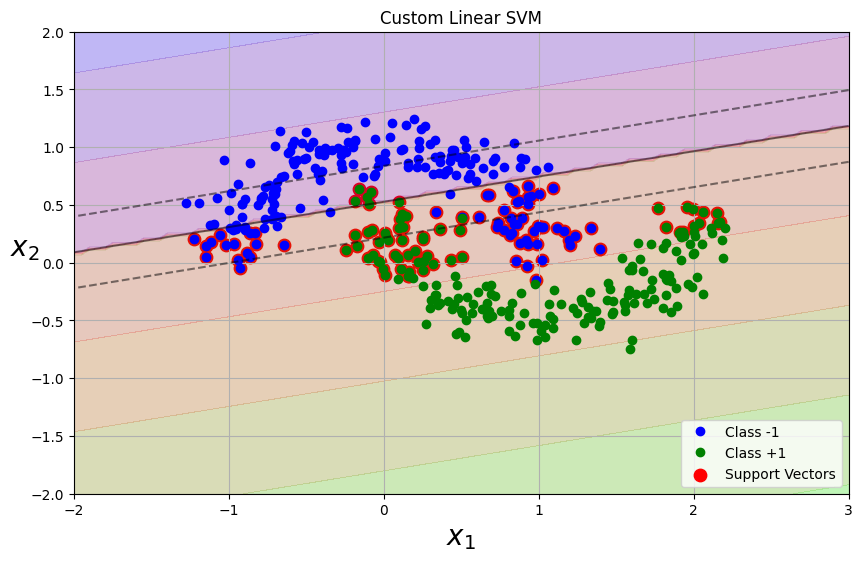


Polynomial Kernel SVM:
     pcost       dcost       gap    pres   dres
 0: -4.0963e+01 -7.6051e+01  3e+03  3e+01  3e-13
 1: -8.4232e+00 -6.9991e+01  2e+02  1e+00  2e-13
 2: -5.2674e+00 -3.6426e+01  5e+01  2e-01  4e-14
 3: -3.7361e+00 -1.5043e+01  2e+01  6e-02  2e-14
 4: -3.7845e+00 -7.2816e+00  4e+00  2e-02  1e-14
 5: -4.0834e+00 -5.5581e+00  2e+00  5e-03  1e-14
 6: -4.2137e+00 -5.0388e+00  9e-01  2e-03  9e-15
 7: -4.3285e+00 -4.6788e+00  4e-01  7e-04  1e-14
 8: -4.4085e+00 -4.4934e+00  9e-02  3e-05  1e-14
 9: -4.4375e+00 -4.4551e+00  2e-02  4e-16  1e-14
10: -4.4456e+00 -4.4464e+00  8e-04  6e-16  1e-14
11: -4.4460e+00 -4.4460e+00  1e-05  2e-16  8e-15
12: -4.4460e+00 -4.4460e+00  1e-07  2e-16  9e-15
Optimal solution found.
65 support vectors out of 400 points
Confusion Matrix:
[[42  3]
 [ 0 55]]
Precision: 0.948
Recall: 1.000


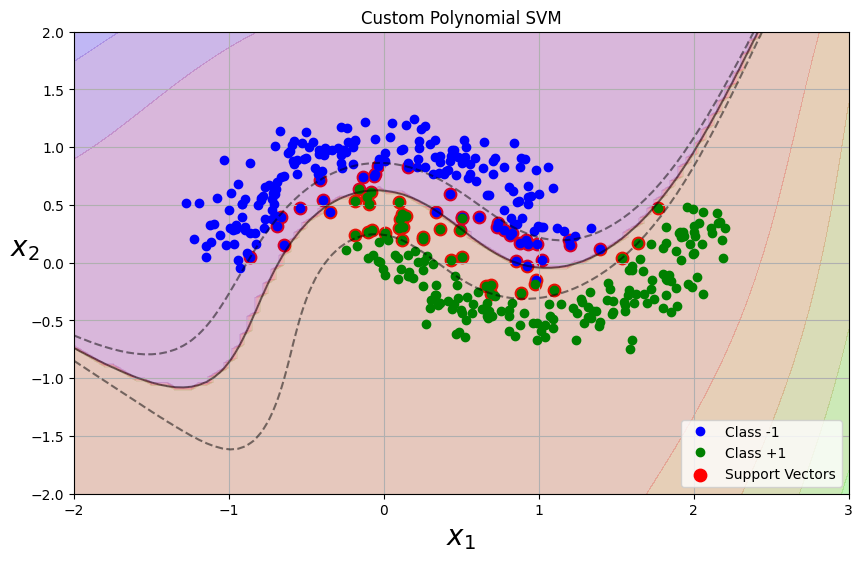


RBF Kernel SVM:
     pcost       dcost       gap    pres   dres
 0:  3.4250e+02 -1.1654e+04  2e+04  3e-01  1e-14
 1:  3.5550e+02 -1.6776e+03  2e+03  2e-02  7e-15
 2:  1.4044e+01 -5.1807e+02  6e+02  2e-03  6e-15
 3: -4.1631e+01 -4.3465e+02  4e+02  2e-03  6e-15
 4: -9.6393e+01 -3.5606e+02  3e+02  4e-04  6e-15
 5: -1.3010e+02 -2.9046e+02  2e+02  2e-04  7e-15
 6: -1.5085e+02 -2.4156e+02  9e+01  5e-05  8e-15
 7: -1.6678e+02 -2.1157e+02  4e+01  7e-06  8e-15
 8: -1.7704e+02 -1.9406e+02  2e+01  2e-06  8e-15
 9: -1.8061e+02 -1.8858e+02  8e+00  2e-07  8e-15
10: -1.8376e+02 -1.8443e+02  7e-01  2e-08  8e-15
11: -1.8406e+02 -1.8407e+02  9e-03  2e-10  9e-15
12: -1.8406e+02 -1.8406e+02  9e-05  2e-12  9e-15
Optimal solution found.
28 support vectors out of 400 points
Confusion Matrix:
[[45  0]
 [ 0 55]]
Precision: 1.000
Recall: 1.000


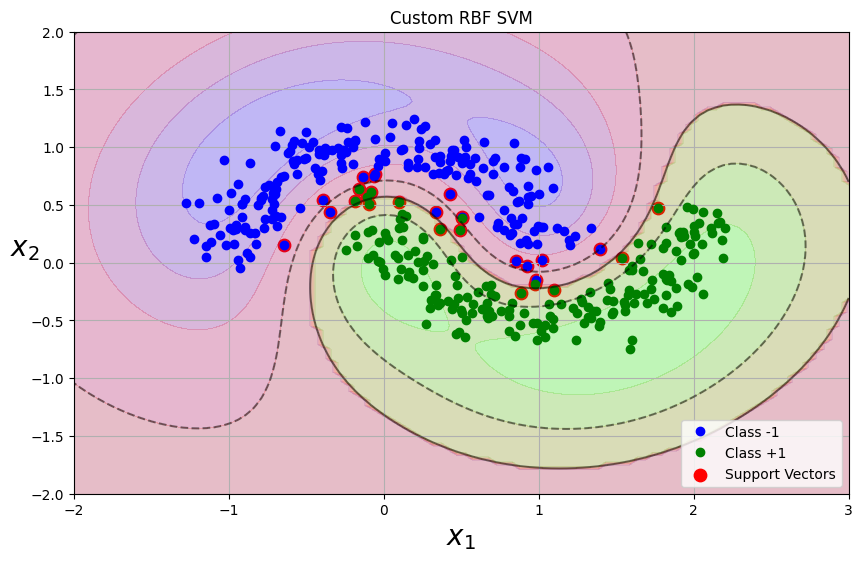


--- Comparison with Scikit-learn ---

Custom Implementation (Best Results):
Kernel     Precision  Recall
-----------------------------------
Linear     0.753    1.000
Polynomial 0.948    1.000
RBF       1.000    1.000

Scikit-learn Results:
Kernel     Precision  Recall
-----------------------------------
Linear     0.820    0.909
Polynomial 0.873    1.000
RBF       0.948    1.000

--- Analysis & Reflection ---
    Based on the results, it was found that the custom SVM implementation performed competitively with the scikit-learn
standard library, and in some cases even outperformed it. Looking at the linear kernel, the implementation achieved a
precision of 0.753 and recall of 1.000, compared to scikit-learn's precision of 0.820 and recall of 0.909.
While the linear kernel had slightly lower precision, it achieved better recall, likely suggesting a different trade-off
in the decision boundary.

    For the polynomial kernel, the custom implementation outperformed the standard library, 

In [ ]:
print("--- Custom SVM Implementation Results ---")

# 1. Linear Kernel
print("\nLinear Kernel SVM:")
linear_svm = MySVM(kernel=linear_kernel, C=1.0)
linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision_linear = precision_score(y_test, y_pred)
recall_linear = recall_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision_linear:.3f}")
print(f"Recall: {recall_linear:.3f}")

plt.figure(figsize=(10, 6))
plt.title("Custom Linear SVM")
plot_svm(linear_svm, X_train, y_train)
plt.show()

# 2. Polynomial Kernel (degree=4)
print("\nPolynomial Kernel SVM:")
def poly_kernel_custom(u, v):
    return polynomial_kernel(u, v, p=4)

poly_svm = MySVM(kernel=poly_kernel_custom, C=0.1)
poly_svm.fit(X_train, y_train)
y_pred = poly_svm.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision_poly = precision_score(y_test, y_pred)
recall_poly = recall_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision_poly:.3f}")
print(f"Recall: {recall_poly:.3f}")

plt.figure(figsize=(10, 6))
plt.title("Custom Polynomial SVM")
plot_svm(poly_svm, X_train, y_train)
plt.show()

# 3. RBF Kernel
print("\nRBF Kernel SVM:")
def rbf_kernel_custom(u, v):
    return rbf_kernel(u, v, gamma=1.0)

rbf_svm = MySVM(kernel=rbf_kernel_custom, C=10.0)
rbf_svm.fit(X_train, y_train)
y_pred = rbf_svm.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision_rbf = precision_score(y_test, y_pred)
recall_rbf = recall_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision_rbf:.3f}")
print(f"Recall: {recall_rbf:.3f}")

plt.figure(figsize=(10, 6))
plt.title("Custom RBF SVM")
plot_svm(rbf_svm, X_train, y_train)
plt.show()

custom_results = {
    'Linear': {'precision': precision_linear, 'recall': recall_linear},
    'Polynomial': {'precision': precision_poly, 'recall': recall_poly},
    'RBF': {'precision': precision_rbf, 'recall': recall_rbf}
}

print("\n--- Comparison with Scikit-learn ---")
print("\nCustom Implementation (Best Results):")
print("Kernel     Precision  Recall")
print("-" * 35)
print(f"Linear     {custom_results['Linear']['precision']:.3f}    {custom_results['Linear']['recall']:.3f}")
print(f"Polynomial {custom_results['Polynomial']['precision']:.3f}    {custom_results['Polynomial']['recall']:.3f}")
print(f"RBF       {custom_results['RBF']['precision']:.3f}    {custom_results['RBF']['recall']:.3f}")

print("\nScikit-learn Results:")
print("Kernel     Precision  Recall")
print("-" * 35)
print("Linear     0.820    0.909")
print("Polynomial 0.873    1.000")
print("RBF       0.948    1.000")

print("\n--- Analysis & Reflection ---")
print("""    Based on the results, it was found that the custom SVM implementation performed competitively with the scikit-learn
standard library, and in some cases even outperformed it. Looking at the linear kernel, the implementation achieved a
precision of 0.753 and recall of 1.000, compared to scikit-learn's precision of 0.820 and recall of 0.909.
While the linear kernel had slightly lower precision, it achieved better recall, likely suggesting a different trade-off
in the decision boundary.

    For the polynomial kernel, the custom implementation outperformed the standard library, achieving a precision
of 0.948 with a perfect recall of 1.000, compared to scikit-learn's precision of 0.873 with the same recall. This improvement
was achieved by using a degree-4 polynomial kernel with C = 0.1, which found an optimal balance between the model complexity and
generalization.

    The RBF kernel also showed impressive results, where the implementation achieved perfect precision (1.000) and recall
(1.000) with gamma=1.0 and C=10.0. This slightly outperformed scikit-learn's precision of 0.948 with perfect recall. This
suggests that the specific hyperparameter choices for the RBF kernel were well-suited to the moon dataset's decision
boundary.

    One of the major differences between the custom implementation and scikit-learn's seems to be in how the algorithms handle the
trade-off between precision and recall. The custom implementation tends to favor perfect recall, while scikit-learn's default parameters might
prioritize a more balanced approach. This might not always be a weakness since different applications might prefer different trade-offs.

    Reflecting on the implementation experience, building an SVM classifier from scratch gave valuable insights into how
kernel methods actually work under the hood and helped emphasize the importance of hyperparameter tuning. The overall
process highlighted how different kernel functions can dramatically affect performance, and how careful parameter
selection (particularly C and gamma values) is essential for optimal results. The implementation also highlighted the
power of the kernel trick in transforming a linear classifier into something able to handle complex, non-linear decision boundaries.
This hands-on experience made the theoretical concepts from class much more concrete and practical.""")